In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from plotnine import *
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from matplotlib.pylab import rcParams
import plotly.io as plt_io


In [2]:
rcParams['figure.figsize'] = 12, 6
plt.style.use('bmh')

### Data Content:

taken from Kaggle: https://www.kaggle.com/datasets/prasertk/major-social-media-stock-prices-20122022

Meta (facebook), twitter, snapchat, etsy, pinterest daily stock prices from 2012-2022
data source: https://finance.yahoo.com/
cover image credit: https://www.pexels.com/photo/person-holding-iphone-showing-social-networks-folder-607812/

In [3]:
df_1 = pd.read_csv('social media stocks 2012-2022.csv')

In [4]:
df_1['Date'] = pd.to_datetime(df_1['Date'])

In [5]:
df_1.head()

Date Symbol  Adj Close      Close       High        Low       Open  \
0 2012-05-18     FB  38.230000  38.230000  45.000000  38.000000  42.049999   
1 2012-05-21     FB  34.029999  34.029999  36.660000  33.000000  36.529999   
2 2012-05-22     FB  31.000000  31.000000  33.590000  30.940001  32.610001   
3 2012-05-23     FB  32.000000  32.000000  32.500000  31.360001  31.370001   
4 2012-05-24     FB  33.029999  33.029999  33.209999  31.770000  32.950001   

        Volume  
0  573576400.0  
1  168192700.0  
2  101786600.0  
3   73600000.0  
4   50237200.0

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8398 entries, 0 to 8397
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8398 non-null   datetime64[ns]
 1   Symbol     8398 non-null   object        
 2   Adj Close  8398 non-null   float64       
 3   Close      8398 non-null   float64       
 4   High       8398 non-null   float64       
 5   Low        8398 non-null   float64       
 6   Open       8398 non-null   float64       
 7   Volume     8398 non-null   float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 525.0+ KB


In [7]:
df_1.head()

Date Symbol  Adj Close      Close       High        Low       Open  \
0 2012-05-18     FB  38.230000  38.230000  45.000000  38.000000  42.049999   
1 2012-05-21     FB  34.029999  34.029999  36.660000  33.000000  36.529999   
2 2012-05-22     FB  31.000000  31.000000  33.590000  30.940001  32.610001   
3 2012-05-23     FB  32.000000  32.000000  32.500000  31.360001  31.370001   
4 2012-05-24     FB  33.029999  33.029999  33.209999  31.770000  32.950001   

        Volume  
0  573576400.0  
1  168192700.0  
2  101786600.0  
3   73600000.0  
4   50237200.0

In [8]:
df_1 = df_1.set_index('Date')

In [9]:
df_1.head()

Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2012-05-18     FB  38.230000  38.230000  45.000000  38.000000  42.049999   
2012-05-21     FB  34.029999  34.029999  36.660000  33.000000  36.529999   
2012-05-22     FB  31.000000  31.000000  33.590000  30.940001  32.610001   
2012-05-23     FB  32.000000  32.000000  32.500000  31.360001  31.370001   
2012-05-24     FB  33.029999  33.029999  33.209999  31.770000  32.950001   

                 Volume  
Date                     
2012-05-18  573576400.0  
2012-05-21  168192700.0  
2012-05-22  101786600.0  
2012-05-23   73600000.0  
2012-05-24   50237200.0

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8398 entries, 2012-05-18 to 2022-04-06
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     8398 non-null   object 
 1   Adj Close  8398 non-null   float64
 2   Close      8398 non-null   float64
 3   High       8398 non-null   float64
 4   Low        8398 non-null   float64
 5   Open       8398 non-null   float64
 6   Volume     8398 non-null   float64
dtypes: float64(6), object(1)
memory usage: 524.9+ KB


In [11]:
df_1['Symbol'].unique()

array(['FB', 'TWTR', 'ETSY', 'SNAP', 'PINS'], dtype=object)

In [12]:
df_1.groupby('Symbol').size()

Symbol
ETSY    1758
FB      2488
PINS     749
SNAP    1285
TWTR    2118
dtype: int64

In [13]:
df_FB = df_1[df_1['Symbol']== 'FB']
df_ETSY = df_1[df_1['Symbol']== 'ETSY']
df_PINS = df_1[df_1['Symbol']== 'PINS']
df_SNAP = df_1[df_1['Symbol']== 'SNAP']
df_TWTR = df_1[df_1['Symbol']== 'TWTR']

In [14]:
df_PINS.head()

Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2019-04-18   PINS  24.400000  24.400000  25.180000  23.049999  23.750000   
2019-04-22   PINS  24.990000  24.990000  25.680000  23.570000  24.620001   
2019-04-23   PINS  25.850000  25.850000  27.750000  25.230000  25.379999   
2019-04-24   PINS  26.799999  26.799999  27.030001  25.933001  26.500000   
2019-04-25   PINS  28.799999  28.799999  29.400000  26.670000  27.450001   

                Volume  
Date                    
2019-04-18  87109500.0  
2019-04-22  19746800.0  
2019-04-23  19245400.0  
2019-04-24   9477200.0  
2019-04-25  16648300.0

In [15]:
df_PINS.tail()

Symbol  Adj Close      Close       High        Low       Open  \
Date                                                                       
2022-03-31   PINS  24.610001  24.610001  26.000000  24.580000  25.850000   
2022-04-01   PINS  24.809999  24.809999  25.459999  24.510000  24.730000   
2022-04-04   PINS  27.400000  27.400000  27.950001  25.500000  25.500000   
2022-04-05   PINS  26.129999  26.129999  27.510000  26.100000  27.400000   
2022-04-06   PINS  24.440001  24.440001  25.559999  23.870001  25.559999   

                Volume  
Date                    
2022-03-31  10028400.0  
2022-04-01   7078400.0  
2022-04-04  16858000.0  
2022-04-05   8061500.0  
2022-04-06  12274200.0

In [16]:
df_PINS = df_PINS.resample('D').bfill().reset_index()

In [17]:
df_PINS = df_PINS.set_index('Date')

In [18]:
df_PINS.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1085 entries, 2019-04-18 to 2022-04-06
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     1085 non-null   object 
 1   Adj Close  1085 non-null   float64
 2   Close      1085 non-null   float64
 3   High       1085 non-null   float64
 4   Low        1085 non-null   float64
 5   Open       1085 non-null   float64
 6   Volume     1085 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.8+ KB


Text(0.5, 1.0, 'Daily Pintrest stock price')

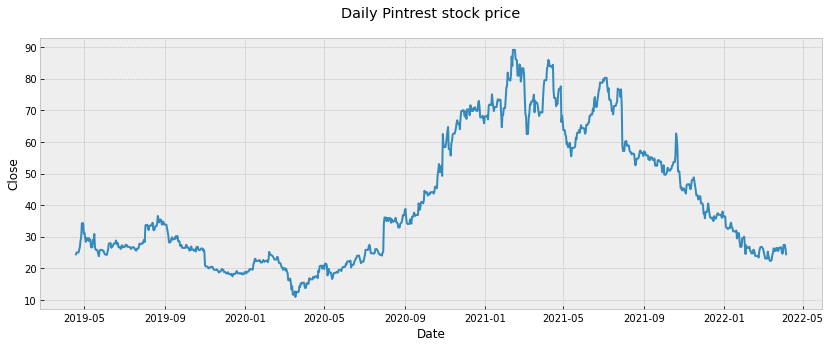

In [19]:
plt.figure(figsize = (14, 5))
sns.lineplot(x=df_PINS.index, y=df_PINS.Close)
plt.title("Daily Pintrest stock price", pad=20)

### Plotting Performance of all 5 Social Media Companies on one chart: 

In [20]:
# create custom theme from the plotly_simple_white theme by applying color modifications: 
plt_io.templates["simple_white"] = plt_io.templates["simple_white"]

# set the paper_bgcolor and the plot_bgcolor to a new color
plt_io.templates["simple_white"]['layout']['paper_bgcolor'] = '#f5efcb'
plt_io.templates["simple_white"]['layout']['plot_bgcolor'] = '#f5efcb'

# you may also want to change gridline colors if you are modifying background
#plt_io.templates['simple_white']['layout']['yaxis']['gridcolor'] = '#4f687d'
#plt_io.templates['simple_white']['layout']['xaxis']['gridcolor'] = '#4f687d'

fig = px.line(df_1, x=df_1.index, y='Close', color='Symbol',  title='Stock prices of 5 Social Media Companies', 
              color_discrete_sequence=px.colors.qualitative.Dark2)
fig.layout.template = 'simple_white'
fig.show()

### Plotting Performance of all 5 companies with Time Slider option to be able to view prices over different ranges of time:

In [21]:
plt_io.templates["plotly_dark"] = plt_io.templates["plotly_dark"]

# set the paper_bgcolor and the plot_bgcolor to a new color
plt_io.templates["plotly_dark"]['layout']['paper_bgcolor'] = '#807e7e'
plt_io.templates["plotly_dark"]['layout']['plot_bgcolor'] = '#636161'
fig = px.line(df_1, x=df_1.index, y='Close', color='Symbol', title='Stock prices over time **use slider below the main chart**', 
              color_discrete_sequence=px.colors.qualitative.Safe)
fig.layout.template = 'plotly_dark'
fig.update_xaxes(rangeslider_visible=True)
fig.show()

### Closer look at Pintrest Stock Performance:

In [22]:
plt_io.templates["simple_white"] = plt_io.templates["simple_white"]

# set the paper_bgcolor and the plot_bgcolor to a new color
plt_io.templates["simple_white"]['layout']['paper_bgcolor'] = '#7ba7a8'
plt_io.templates["simple_white"]['layout']['plot_bgcolor'] = '#4b6566'

fig = go.Figure([go.Scatter(name = 'Open', x=df_PINS.index, y=df_PINS['Open'], mode='markers', text=df_PINS['Close'], )]) 
fig.add_scatter(name = 'High',x=df_PINS.index, y=df_PINS['High'], mode='lines')
fig.add_scatter(name = 'Low',x=df_PINS.index, y=df_PINS['Low'], mode='lines')
fig.update_layout(title='Pintrest Stock Performance')
fig.layout.template = 'simple_white'
fig.show()

In [23]:
df_grouped_close = df_1.groupby(['Symbol'], as_index=False)['Close'].mean()

In [24]:
df_grouped_close.head()

Symbol       Close
0   ETSY   68.385668
1     FB  147.413416
2   PINS   40.759039
3   SNAP   26.401650
4   TWTR   35.549764

### What is the average stock value of each company;

In [25]:
plt_io.templates["plotly_dark"] = plt_io.templates["plotly_dark"]

plt_io.templates["plotly_dark"]['layout']['paper_bgcolor'] = '#044a38'
plt_io.templates["plotly_dark"]['layout']['plot_bgcolor'] = '#044a38'

# you may also want to change gridline colors if you are modifying background
plt_io.templates['plotly_dark']['layout']['yaxis']['gridcolor'] = '#777878'
plt_io.templates['plotly_dark']['layout']['xaxis']['gridcolor'] = '#777878'

fig = px.bar(df_grouped_close, x=df_grouped_close.Symbol, y='Close',
             color='Symbol',
             height=400, 
            title='Average Price', template='plotly_dark', color_discrete_sequence=px.colors.qualitative.Antique)
fig.layout.template = 'plotly_dark'
fig.show()

### What is average volume of shares sold:

In [26]:
df_grouped_volume = df_1.groupby(['Symbol'], as_index=False)['Volume'].mean()

In [27]:
plt_io.templates["ggplot2"] = plt_io.templates["ggplot2"]

plt_io.templates["ggplot2"]['layout']['paper_bgcolor'] = '#cfc9b4'   #2d2e2e
plt_io.templates["ggplot2"]['layout']['plot_bgcolor'] = '#786f50'

plt_io.templates['ggplot2']['layout']['yaxis']['gridcolor'] = '#18360e'
plt_io.templates['ggplot2']['layout']['xaxis']['gridcolor'] = '#18360e'

fig = px.bar(df_grouped_volume, x=df_grouped_volume.Symbol, y='Volume',
             color='Symbol',
             height=400, 
            title='Average volume of shares', template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10)
fig.layout.template = 'ggplot2'
fig.show()

# 1 e)

Use a set of subplots to show different times of the series. You must justify the library you selected,
reasoning and segmentation you performed in order to show valuable insights about the topic.

Subplots with Seaborn

## Subplots with Seaborn

#### View of each Company Peformance on seperate chart

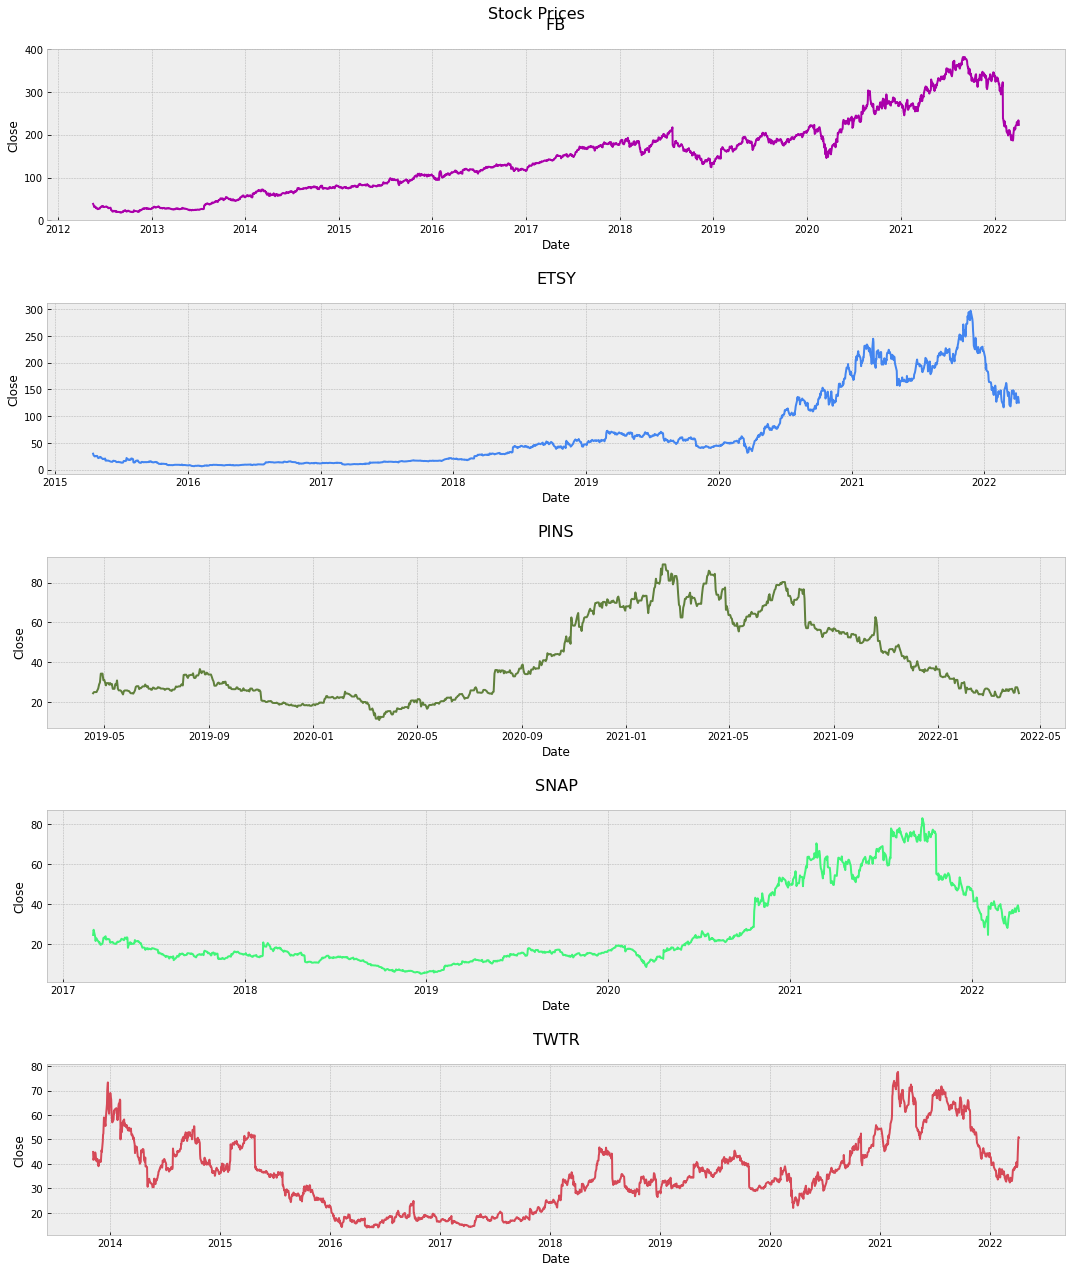

In [28]:
fig, axes = plt.subplots(nrows=5, figsize=(15,18))

fig.suptitle("Stock Prices",fontsize=16)
sns.axes_style("whitegrid")

# 1
sns.lineplot(ax=axes[0],data=df_FB, x=df_FB.index, y='Close', color='#aa00aa')
axes[0].set_title('FB', fontsize=16, pad=20)

# 2
sns.lineplot(ax=axes[1],data=df_ETSY, x=df_ETSY.index, y='Close', color='#4385f0')
axes[1].set_title('ETSY', fontsize=16, pad=20)

# 3
sns.lineplot(ax=axes[2],data=df_PINS, x=df_PINS.index, y='Close', color='#60803c')
axes[2].set_title('PINS', fontsize=16, pad=20)

#  4
sns.lineplot(ax=axes[3],data=df_SNAP, x=df_SNAP.index, y='Close', color='#40f579')
axes[3].set_title('SNAP', fontsize=16, pad=20)

#  5
sns.lineplot(ax=axes[4],data=df_TWTR, x=df_TWTR.index, y='Close', color='#d64957')
axes[4].set_title('TWTR', fontsize=16, pad=20)

fig.tight_layout(h_pad=2, w_pad=3)

### Closer look at Pintrest performance over the years:

In [29]:

df_PINS_19 = df_PINS['2019']
df_PINS_20 = df_PINS['2020']
df_PINS_21 = df_PINS['2021']


In [30]:
df_PINS_20.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Symbol     366 non-null    object 
 1   Adj Close  366 non-null    float64
 2   Close      366 non-null    float64
 3   High       366 non-null    float64
 4   Low        366 non-null    float64
 5   Open       366 non-null    float64
 6   Volume     366 non-null    float64
dtypes: float64(6), object(1)
memory usage: 22.9+ KB


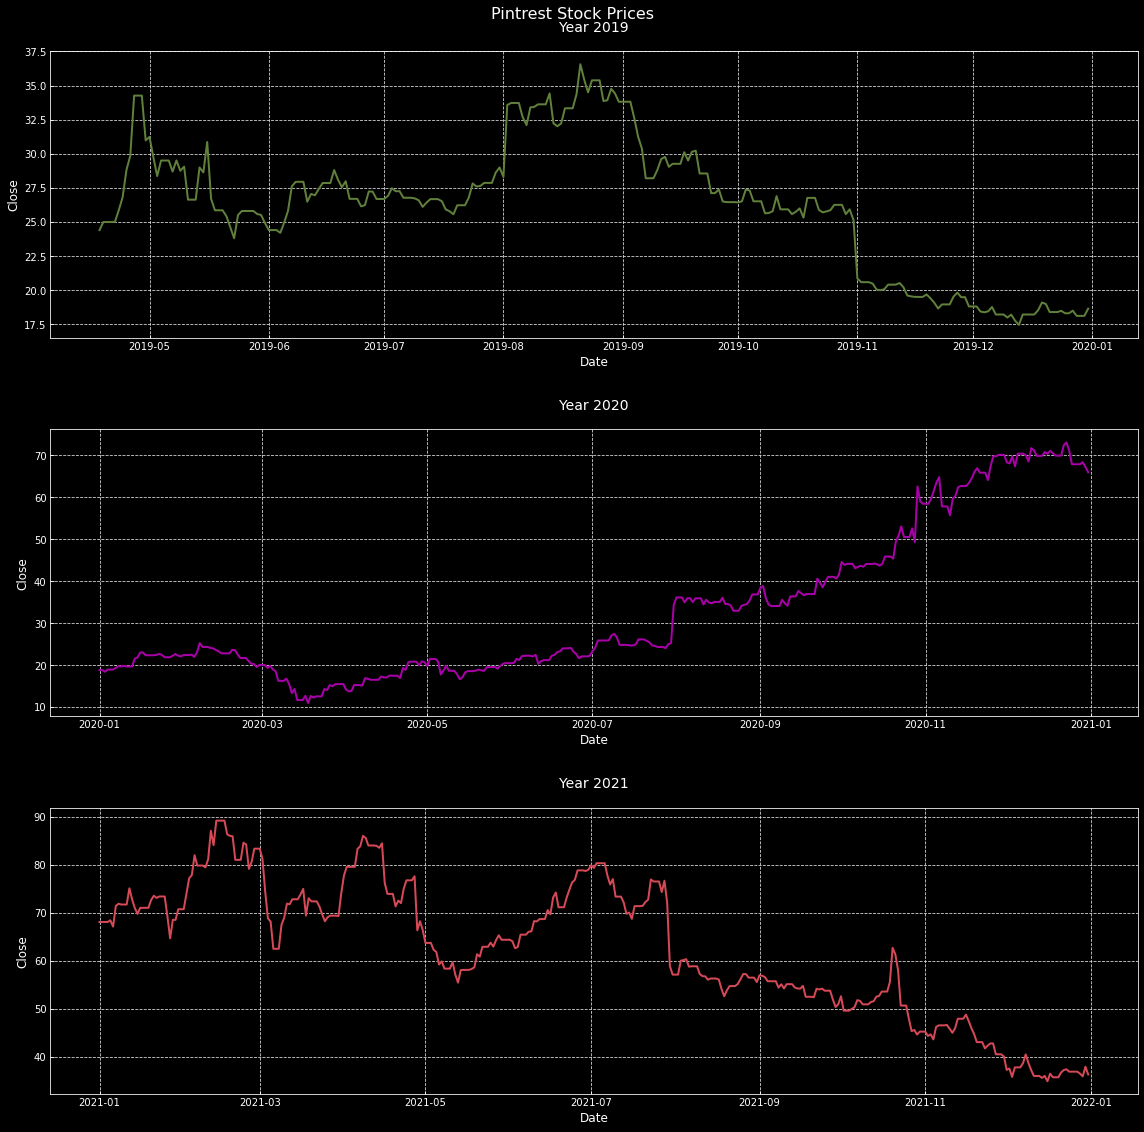

In [31]:
plt.style.use('dark_background')

fig, axes = plt.subplots(nrows=3, figsize=(16,16))

fig.suptitle("Pintrest Stock Prices",fontsize=16)


sns.lineplot(ax=axes[0],data=df_PINS_19, x=df_PINS_19.index, y='Close', color='#60803c')
axes[0].grid(which='major', color='#DDDDDD', linewidth=0.8, linestyle='--')
axes[0].set_title('Year 2019', fontsize=14, pad=20)

sns.lineplot(ax=axes[1],data=df_PINS_20, x=df_PINS_20.index, y='Close', color='#aa00aa')
axes[1].grid(which='major', color='#DDDDDD', linewidth=0.8, linestyle='--')
axes[1].set_title('Year 2020', fontsize=14, pad=20)


sns.lineplot(ax=axes[2],data=df_PINS_21, x=df_PINS_21.index, y='Close', color='#d64957')
axes[2].grid(which='major', color='#DDDDDD', linewidth=0.8, linestyle='--')
axes[2].set_title('Year 2021', fontsize=14, pad=20)

fig.tight_layout(h_pad=3, w_pad=3)